# Regresión Lineal

La regresión lineal es una técnica muy usada en estadística para estudiar relación entre ciertas variables de interes. En el ámbito social, la regresión se utiliza en la predicción de fenómenos naturales y fenómenos que tienen que ver con el comportamiento humano, como la economía. 

El análisis de regresión se utiliza para establecer o cuantificar una relación del tipo lineal de una variable llamada **dependiente** $Y$ y las variables **predictoras** $X_1, X_2, ..., X_n$.

# Modelos de regresión simple
Un modelo de regresión intenta explicar una variable o atributo en estudio $Y$ , por medio de una variable explicativa $X$. El modelo es de la forma:
$$Y = f(X) + \epsilon $$
Donde la función $f$ representa la parte determinística o componente sistemática y $\epsilon$ corresponde al error
![](/machine_learning/regresion_lineal/regresion.png)
## Regresión lineal simple
El modelo de regresión lineal simple supone la relación:


$$Y = \beta_0 + \beta_1X + \epsilon$$


**Objetivo** Suponemos que un fenómeno es presumiblemente lineal, contamos con una serie de observaciones $(x_i, y_i)_{i = 1}^n$ e intetaremos ajustar un modelo lineal para estas tuplas de datos. La pregunta natural, ¿Como puedo a priori saber el comportamiento lineal? lo más práctica y usado es un análisis visual, es decir, gráficar el conjunto de datos. Ajustar un modelo lineal, significa estimar $\beta_0$ y $\beta_1$. Consideremos el siguiente ejemplo: Se tiene la ganancia total de una población de EEUU v/s el número de habitantes

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
datos = np.loadtxt('datos.txt', delimiter = ',') ## lectura de datos, delimiter separa columnas por las comas
print np.shape(datos)

(97L, 2L)


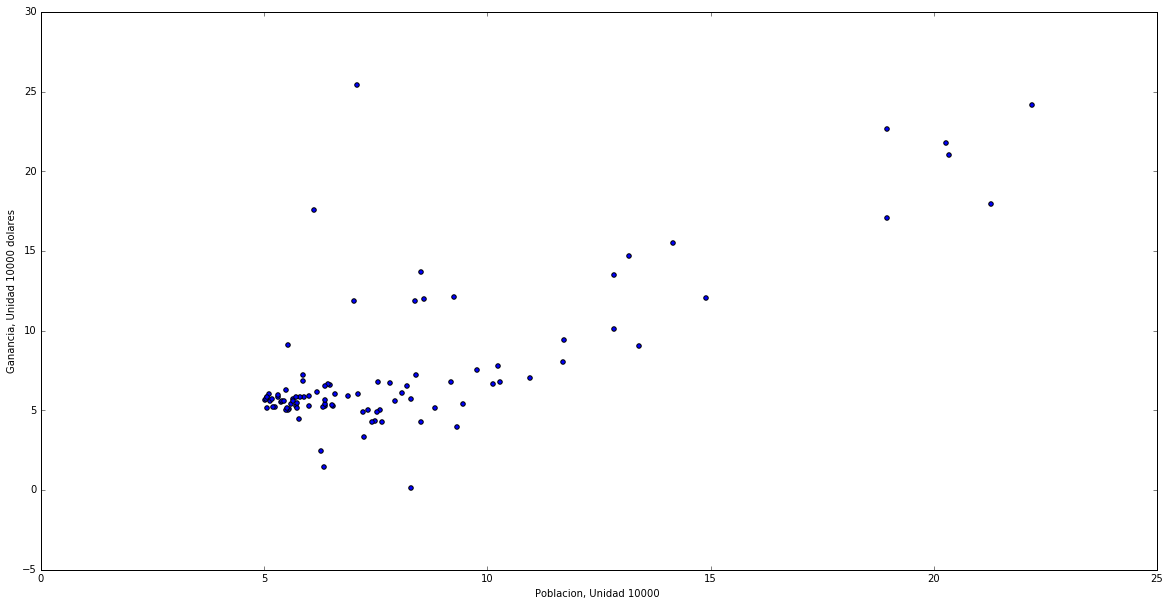

In [29]:
## Visualizacion ##
x = datos[:,0]
y = datos[:,1]
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.xlabel("Poblacion, Unidad 10000 ")
plt.ylabel("Ganancia, Unidad 10000 dolares")
plt.show()

Un análisis visual del ejemplo anterior nos hace suponer que la relación es lineal!!. La dispersión de los datos puede ser atribuible a un ruido. Entonces debemos establecer técnicas para estimar los parámetros $\beta_0$ y $\beta_1$

## Estimación de parámetros: Minímos cuadrados

Estamos suponiendo que un fenómeno se puede describir de la forma
$$Y = \beta_0 + \beta_1X + \epsilon$$

* La suposición principal del modelo de regresión lineal simple, es que el error es una variable aleatoria normal $N(0,\sigma^2)$. 


* La suposición de normalidad implica que para un valor fijo $x$  de $X$, el valor esperado de $Y$ varia linealmente, esto es


$$E(Y \hspace{0.1cm}|\hspace{0.1cm} X = x ) = \beta_0 + \beta_1x + E(\epsilon \hspace{0.1cm}|\hspace{0.1cm} X = x) = \beta_0 + \beta_1x$$


* Para un valor $x$ de $X$ entonces, se predice el valor de $Y$ dado por $y =  E(Y\hspace{0.1cm}|\hspace{0.1cm} X = x ) = \beta_0 + \beta_1 x$


* Asumiremos hipótesis de independencia: Los errores asociados a los valores de Y son independientes unos de otros, por lo tanto   la distribución de Y para x fijo es normal, con varianza constante $\sigma^2$ , y media que varía linealmente con $x$, dada por $\beta_0 + \beta_1 x$. 


* Supongamos entonces que contamos con una serie de observaciones $(x_i, y_i)_{i = 1}^n$, consideraremos para $x_i$ el valor estimado para $Y$ por


$$\hat{y}_i = \beta_0 + \beta_1 x_i$$


con $\beta_0$ y $\beta_1$ aún desconocidos!. Nuestro valor observado es $y_i$, por lo tanto el error viene dado por


$$\epsilon_i = y_i- \hat{y}_i = y_i - \beta_0 - \beta_1x_i$$


La idea es minimizar el error, consideraremos los errores cudrados, esto es encontrar los minimizadores de
$$\begin{aligned}
\min_{\beta_0, \beta_1} \sum_{i = 1}^n \epsilon_i^2 = \min_{\beta_0, \beta_1} \sum_{i = 1}^n (y_i - \beta_0 -\beta_1x_i)^2 
\end{aligned}$$


Llamemos $F(\beta_0, \beta_1) = \sum_{i = 1}^n (y_i - \beta_0 -\beta_1x_i)^2$, al resolver la ecuación $\nabla F = 0$ se tiene

$$\hat{\beta}_1 = \frac{SS_{xy}}{SS_{xx}}$$

y 

$$\hat{\beta}_0 = \overline{y}-  \hat{\beta}_1\overline{x}$$

donde $$\overline{y} = \sum_{i= 1}^n y_i$$  $$\overline{x} = \sum_{i= 1}^n x_i$$ $$SS_{xy} = \sum_{i = 1}^n x_iy_i - n\overline{x}\overline{y}$$ $$SS_{xx} = \sum_{i = 1}^n x_i^2- n\overline{x}^2$$

In [18]:
## Implementación en Python ##
def estimacion_parametros(x,y):    ## los imputs son arrays
    numero_de_datos = len(x)
    promedio_x = np.mean(x)
    promedio_y = np.mean(y)
    SS_xy = np.dot(x,y) - numero_de_datos*promedio_x*promedio_y
    SS_xx = np.dot(x,x) - numero_de_datos*promedio_x**2
    return promedio_y - (SS_xy/SS_xx)*promedio_x, SS_xy/SS_xx
## entrega beta_0 y beta_1 en ese orden ##

In [19]:
## aplicación a nuestro ejemplo ##
print "beta_0", "beta_1" , " =",  estimacion_parametros(x,y)

beta_0 beta_1  = (0.06876894327205996, 0.9309591079306955)


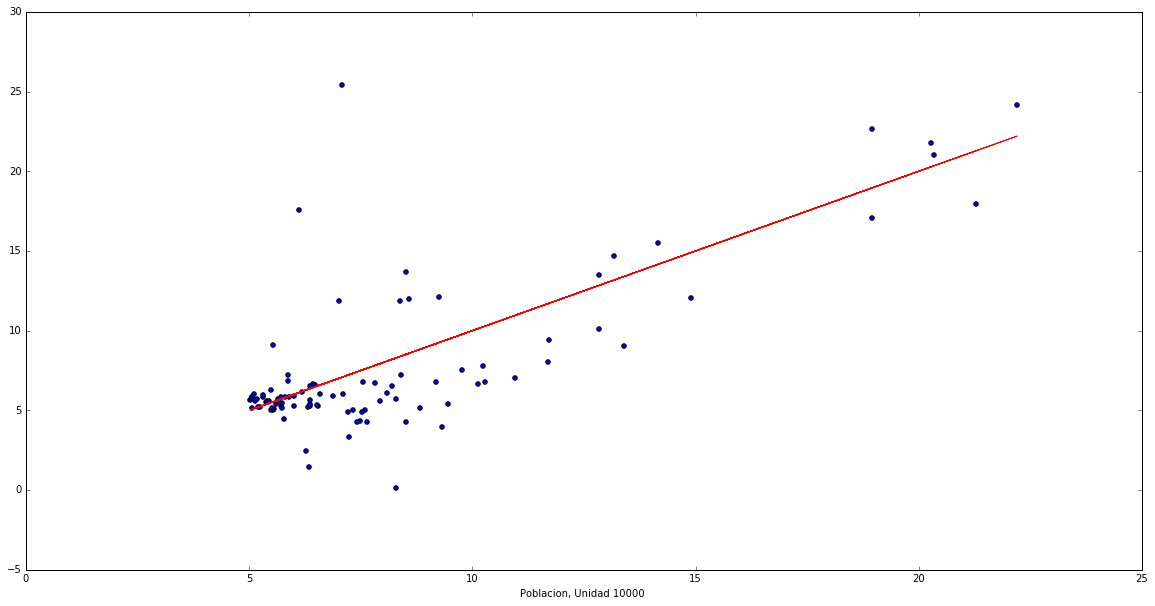

In [30]:
## Visualización ###
beta_0, beta_1 = estimacion_parametros(x,x)
y_predicho = beta_0 + beta_1*x
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_predicho, color = 'r', label = 'ajuste lineal')
plt.xlabel("Poblacion, Unidad 10000 ")

# Regresión lineal múltiple

El modelo de regresión múltiple es una generalización de la regresión simple. Suponemos que existes $p$ variables explicativas $X_1, X_2, ..., X_p$ y se relacionan con la variable de estudio $Y$ de la forma
$$Y = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \epsilon$$


El error $\epsilon$ es considerado $N(0,\sigma^2)$ y satisface $E(\epsilon \hspace{0.1cm}|\hspace{0.1cm}X_j = x) = 0$ para todo $j =1,2,...,p$. Los coeficientes $\beta_0, \beta_1, ..., \beta_p$ son los parámetros regresores. 


A continuación, al igual que el caso simple, establerceremos las ecuaciones para estimar los parámetros regresores. Supongamos que tenemos una muestra aleatoria $\lbrace (y_i, x_{1i}, x_{2i}..., x_{pi}), i = 1, 2 ..., n\rbrace$. 

Tenemos entonces que

$$\begin{aligned}
y_1 &=& \beta_0 + \beta_{1}x_{11} + \beta_2x_{21}+ \hspace{0.05cm}...\hspace{0.05cm}+ \beta_p x_{p1} + \epsilon_1 \\
y_2 &=& \beta_0 + \beta_{1}x_{12} + \beta_2x_{22}+ \hspace{0.05cm}...\hspace{0.05cm}+ \beta_p x_{p2} +\epsilon_2 \\
...  & & \hspace{1cm}... \hspace{1cm}... \hspace{1cm}... \\
...  & & \hspace{1cm}... \hspace{1cm}... \hspace{1cm}... \\
y_n &=& \beta_0 + \beta_{1}x_{1n} + \beta_2x_{2n}+ \hspace{0.05cm}...\hspace{0.05cm}+ \beta_p x_{pn} + \epsilon_n
\end{aligned}$$


Nuestro estimador $\hat{y}_i$ para $i =1, 2, ..., n$ viene dado por 

$$ \begin{aligned}
\hat{y}_i = E(Y \hspace{0.1cm}|\hspace{0.1cm} X_1 = x_{1i} , X_2 = x_{2i} , ..., X_{p} = x_{pi}) = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} +\hspace{0.05cm}... + \hspace{0.05cm}\beta_px_{pi}
\end{aligned}$$

Escrito como un sistema de ecuaciones se tiene


$$\begin{aligned}
\hat{y}_1 &=& \beta_0 + \beta_{1}x_{11} + \beta_2x_{21}+ \hspace{0.05cm}...\hspace{0.05cm}+ \beta_p x_{p1} \\
\hat{y}_2 &=& \beta_0 + \beta_{1}x_{12} + \beta_2x_{22}+ \hspace{0.05cm}...\hspace{0.05cm}+ \beta_p x_{p2} \\
...  & & \hspace{1cm}... \hspace{1cm}... \hspace{1cm}... \\
...  & & \hspace{1cm}... \hspace{1cm}... \hspace{1cm}... \\
\hat{y}_n &=& \beta_0 + \beta_{1}x_{1n} + \beta_2x_{2n}+ \hspace{0.05cm}...\hspace{0.05cm}+ \beta_p x_{pn}
\end{aligned}$$


Los sitemas anteriores, escritos de forma matricial 


$$\begin{aligned}\textbf{y} = \textbf{X}\beta + \epsilon , \hspace{2cm} \hat{\textbf{y}} = \textbf{X}\beta
\end{aligned}$$


donde 
$$\begin{aligned}
X =\begin{bmatrix}
   1 & x_{11} & x_{21} & \dots  & x_{p1} \\
   1 & x_{12} & x_{22} & \dots  & x_{p2} \\
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_{1n} & x_{1n} & \dots  & x_{pn}
\end{bmatrix} 
, \hspace{0.5cm}
y =\begin{bmatrix}
   y_{1} \\
   y_{2}  \\
   \vdots  \\
   y_{n}
\end{bmatrix},
\hspace{0.5cm}
\hat{y} =\begin{bmatrix}
   \hat{y}_{1} \\
   \hat{y}_{2}  \\
   \vdots  \\
   \hat{y}_{n}
\end{bmatrix},
\hspace{0.5cm}
\beta =\begin{bmatrix}
   \beta_0 \\
   \beta_1 \\
   \vdots  \\
   \beta_p
\end{bmatrix},
\hspace{0.5cm}
\epsilon =\begin{bmatrix}
   \epsilon_1 \\
   \epsilon_2 \\
   \vdots  \\
   \epsilon_n
\end{bmatrix}
\end{aligned}$$

Se cumple que $\epsilon = \textbf{y}- \hat{\textbf{y}}$ y al igual que en el caso lineal simple, usamos la técnica de mínimos cuadrados
$$\min_{\beta_0, \beta_1, ..., \beta_p}\epsilon\cdot\epsilon = \min_{\beta_0, \beta_1, ..., \beta_p}\sum_{i = 1}^n \left( y_i- \beta_0 - \hspace{0.1cm}\beta_1x_{1i}\hspace{0.1cm} - \hspace{0.1cm}\beta_2x_{2i}\hspace{0.1cm} - \hspace{0.1cm}... \hspace{0.1cm} - \hspace{0.1cm} \beta_px_{pi}\right)^2 
$$

 
Se obtiene el mínimo dado por $$\hat{\beta} = [\textbf{X}^{T}\textbf{X}]^{-1}\textbf{X}\textbf{y}$$


## Ejemplo en Python
A continuación mostraremos 2 ejemplos en Python. El primer ejemplo corresponde a una construcción manual, es decir, generaremos datos con una función conocida y probaremos que tan buena es la estimación por minimos cuadrados.


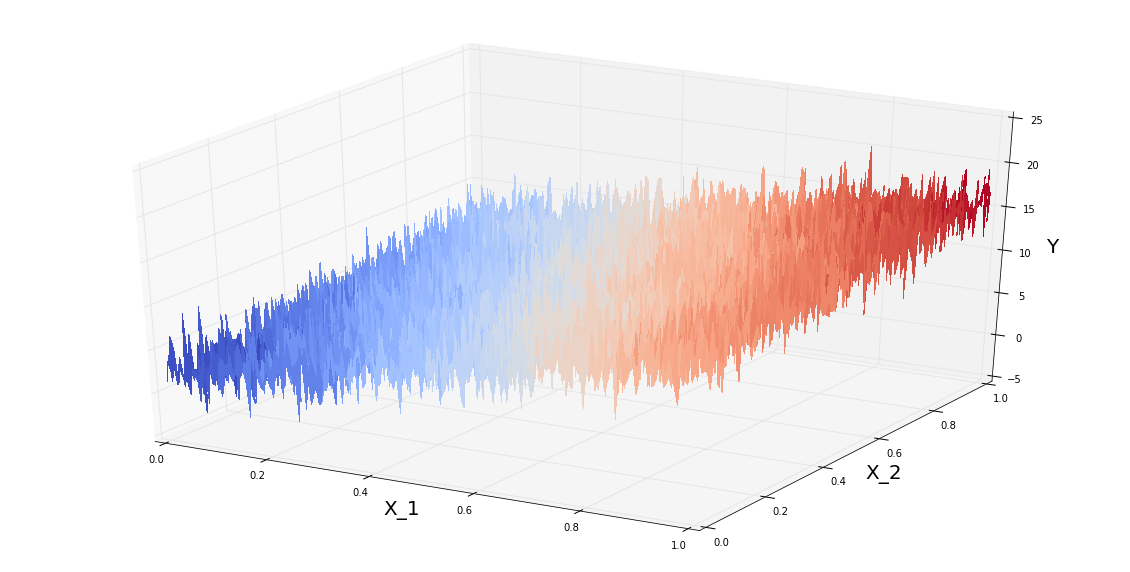

In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(0, 1, 200) ## cantidad de puntos, se puede modificar
X_1, X_2 =  np.meshgrid(x, x) #generamos un mallado simple
beta_0 = 2
beta_1 = 10
beta_2 = 4
Y = beta_0 + beta_1*X_1 + beta_2*X_2 +  np.random.normal(loc=0.0, scale=2.0, size=X_1.shape) ## loc  es la media y scale la var.
## visualizacion ##

figura = plt.figure(figsize=(20,10))
ax = figura.gca(projection = '3d')
ax.set_xlabel('X_1', fontsize=20)
ax.set_ylabel('X_2', fontsize=20)
ax.set_zlabel('Y', fontsize=20)

surf = ax.plot_surface(X_1, X_2, Y, cmap=cm.coolwarm, linewidth=0, antialiased=False)

superficie =ax.plot_surface(X_1, X_2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()


In [7]:
import pandas
X_1 = X_1.flatten()
X_2 = X_2.flatten()
Y = Y.flatten()
datos = pandas.DataFrame({'X_1': X_1, 'X_2': X_2, 'Y': Y})
datos 

,X_1,X_2,Y
0,0.000000,0,1.242841
1,0.005025,0,4.439787
2,0.010050,0,1.413208
3,0.015075,0,3.249944
4,0.020101,0,1.092191
5,0.025126,0,3.544570
6,0.030151,0,2.303277
7,0.035176,0,1.703983
8,0.040201,0,1.594050
9,0.045226,0,0.188623


In [31]:
## usando pandas de forma directa se tiene
import pandas as pd
import statsmodels.formula.api as sm
beta = result = sm.ols(formula="Y ~ X_1 + X_2", data=datos).fit()
print beta

(2.477, 10.671, 4.311)


## Aplicación a data set disponible en skalearn

editando!